In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set default plotting parameters
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk')

In [3]:
# load and visualize data
border_raw = pd.read_csv('Border_Crossing_Entry_Data.csv')

print(border_raw.shape)
border_raw.head()

(346733, 8)


,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [4]:
# checking for null values
# no null values present
border_raw.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Location     0
dtype: int64

In [5]:
# checking column types
border_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


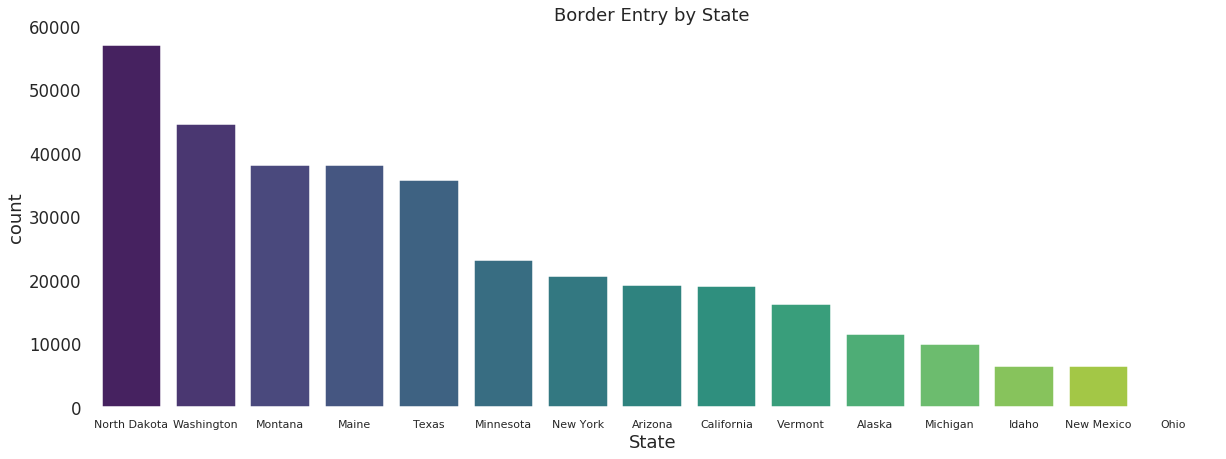

In [6]:
sns.countplot(border_raw.State,
              palette='viridis', order = border_raw['State'].value_counts().index)
sns.despine(left=True, bottom=True)
plt.title('Border Entry by State')
plt.tick_params(axis='x', which='major', labelsize=11)
plt.show()

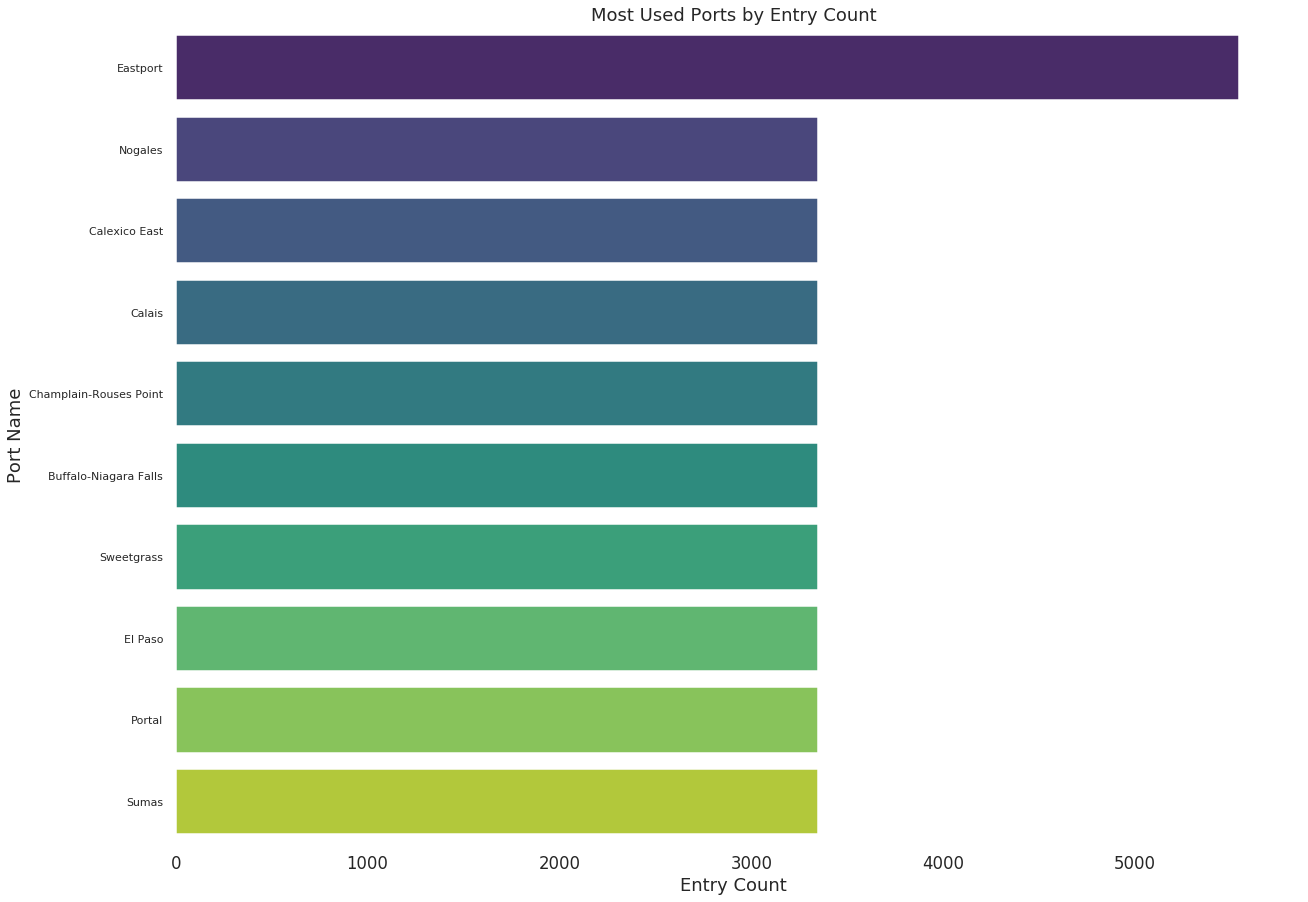

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.countplot(y = border_raw['Port Name'],
              palette='viridis',
              order = border_raw['Port Name'].value_counts().index[0:10])
sns.despine(left=True, bottom=True)
plt.title('Most Used Ports by Entry Count')
plt.ylabel('Port Name')
plt.xlabel('Entry Count')
plt.tick_params(axis='y', which='major', labelsize=11)
plt.show()

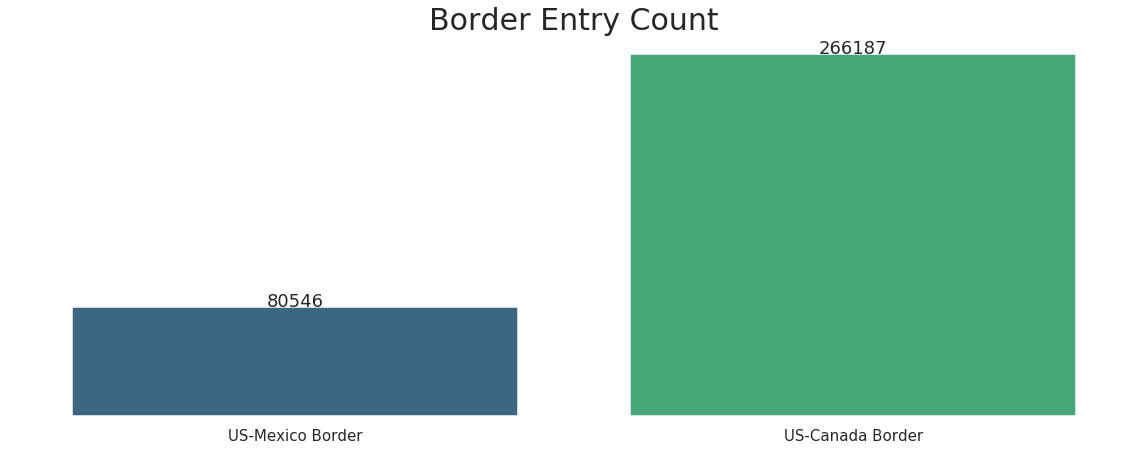

In [8]:
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(border_raw.Border, palette='viridis')
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Border Entry Count', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()